1. We will be using tree based models. (Since the dataset is imbalanced)
2. Aim would be to create a model with low type-II error.
3. We will try out different feature selection techniques and compare their performance.
4. we will use hyperparameter tunning to improve model performance furthur.

In [1]:
! pip install category_encoders
! pip install skfeature-chappers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 2.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
feature_selection = {
    'Technique' : list(),
    'data'      : list()
}

In [4]:
try:
  df = pd.read_csv('../data/raw_data.csv')
except Exception as e:
  df = pd.read_csv('https://raw.githubusercontent.com/soil15/Customer_churn/main/data/raw_data.csv')


df.drop('Unnamed: 0', axis=1, inplace=True)
df.dropna(inplace=True)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [5]:
df['number_vmail_messages'].max()

52

In [6]:
df.iloc[0]

state                                       OH
account_length                             107
area_code                        area_code_415
international_plan                          no
voice_mail_plan                            yes
number_vmail_messages                       26
total_day_minutes                        161.6
total_day_calls                            123
total_day_charge                         27.47
total_eve_minutes                        195.5
total_eve_calls                            103
total_eve_charge                         16.62
total_night_minutes                      254.4
total_night_calls                          103
total_night_charge                       11.45
total_intl_minutes                        13.7
total_intl_calls                             3
total_intl_charge                          3.7
number_customer_service_calls                1
churn                                       no
Name: 0, dtype: object

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

label_encoding_cols = ['international_plan', 'voice_mail_plan', 'churn', 'area_code']
target_encoding_cols = ['state']
target_col = 'churn'


df[label_encoding_cols].head()

,international_plan,voice_mail_plan,churn,area_code
0,no,yes,no,area_code_415
1,no,no,no,area_code_415
2,yes,no,no,area_code_408
3,yes,no,no,area_code_415
4,no,yes,no,area_code_510


In [8]:
df[df['churn'] == 'yes'].iloc[0]

state                                       IN
account_length                              65
area_code                        area_code_415
international_plan                          no
voice_mail_plan                             no
number_vmail_messages                        0
total_day_minutes                        129.1
total_day_calls                            137
total_day_charge                         21.95
total_eve_minutes                        228.5
total_eve_calls                             83
total_eve_charge                         19.42
total_night_minutes                      208.8
total_night_calls                          111
total_night_charge                         9.4
total_intl_minutes                        12.7
total_intl_calls                             6
total_intl_charge                         3.43
number_customer_service_calls                4
churn                                      yes
Name: 8, dtype: object

In [9]:
df.shape

(4250, 20)

#### Feature selection techiniques
    1. PCA and chi_square
    2. Fisher score
    3. Random forest importance

In [10]:
num_cols = [col for col in df.columns if df[col].dtypes != 'object']
cat_cols = [col for col in df.columns if ( df[col].dtypes == 'object' and col != 'churn' ) ]

In [11]:
cat_cols, num_cols

(['state', 'area_code', 'international_plan', 'voice_mail_plan'],
 ['account_length',
  'number_vmail_messages',
  'total_day_minutes',
  'total_day_calls',
  'total_day_charge',
  'total_eve_minutes',
  'total_eve_calls',
  'total_eve_charge',
  'total_night_minutes',
  'total_night_calls',
  'total_night_charge',
  'total_intl_minutes',
  'total_intl_calls',
  'total_intl_charge',
  'number_customer_service_calls'])

In [12]:
num_df = df[num_cols]

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
std_scalar = StandardScaler()
num_df = std_scalar.fit_transform(num_df)

In [15]:
pca = PCA()

num_df = pca.fit_transform(num_df)

num_df = pd.DataFrame(data=num_df)

In [16]:
pca.explained_variance_ratio_

array([1.37360294e-01, 1.34779222e-01, 1.31804605e-01, 1.29866408e-01,
       6.92152057e-02, 6.82530560e-02, 6.72887752e-02, 6.62161372e-02,
       6.54312241e-02, 6.53725059e-02, 6.44120040e-02, 4.90337267e-07,
       5.31571224e-08, 1.51577275e-08, 3.20417659e-09])

In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([0.13736029, 0.27213952, 0.40394412, 0.53381053, 0.60302574,
       0.67127879, 0.73856757, 0.8047837 , 0.87021493, 0.93558743,
       0.99999944, 0.99999993, 0.99999998, 1.        , 1.        ])

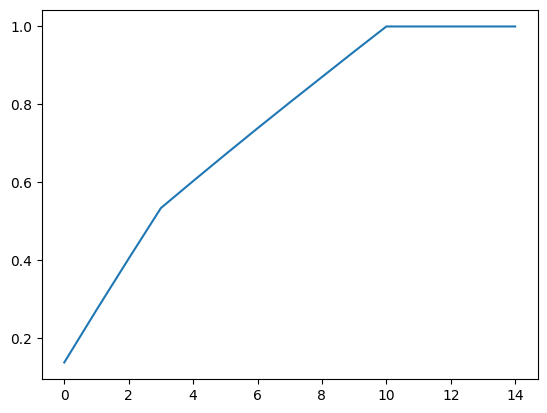

In [18]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

<p> As we can see after 10th feature there is not any significant increase in variance ratio, we can drop last 4 columns </p>

In [19]:
pca_df = num_df.iloc[:, 0:11]
pca_df.shape

(4250, 11)

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

In [21]:
label_encoder = LabelEncoder()

df['international_plan'] = label_encoder.fit_transform(df['international_plan'])

df['voice_mail_plan'] = label_encoder.fit_transform(df['voice_mail_plan'])

df['churn'] = label_encoder.fit_transform(df['churn'])

df['area_code'] = label_encoder.fit_transform(df['area_code'])

In [22]:
target_encoder = ce.TargetEncoder()

df['state'] = target_encoder.fit_transform(X=df['state'], y=df['churn'])

In [23]:
df['international_plan']

0       0
1       0
2       1
3       1
4       0
       ..
4245    0
4246    0
4247    0
4248    0
4249    0
Name: international_plan, Length: 4250, dtype: int64

In [24]:
df['state']

0       0.126324
1       0.270768
2       0.126324
3       0.204934
4       0.157287
          ...   
4245    0.212322
4246    0.136691
4247    0.087632
4248    0.052244
4249    0.116312
Name: state, Length: 4250, dtype: float64

In [25]:
chi_df = df[cat_cols]

In [26]:
chi2_features = SelectKBest(chi2, k=3)

chi_df = pd.DataFrame(data=chi2_features.fit_transform(chi_df, df['churn']))

In [27]:
chi_df.head()

,0,1,2
0,0.126324,0.0,1.0
1,0.270768,0.0,0.0
2,0.126324,1.0,0.0
3,0.204934,1.0,0.0
4,0.157287,0.0,1.0


In [28]:
chi_df.columns

RangeIndex(start=0, stop=3, step=1)

In [29]:
chi_df.rename(columns={0 : 11, 1 : 12, 2 : 13}, inplace=True)

chi_df

,11,12,13
0,0.126324,0.0,1.0
1,0.270768,0.0,0.0
2,0.126324,1.0,0.0
3,0.204934,1.0,0.0
4,0.157287,0.0,1.0
...,...,...,...
4245,0.212322,0.0,0.0
4246,0.136691,0.0,0.0
4247,0.087632,0.0,0.0
4248,0.052244,0.0,1.0


In [30]:
pca_chi_df = pd.concat([pca_df, chi_df, df['churn']], axis=1)

In [31]:
pca_chi_df.shape

(4250, 15)

In [32]:
pca_chi_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,churn
0,-0.323532,-2.114335,0.997691,-0.595870,0.716353,-0.385573,-0.486884,-0.768171,0.624777,-1.156578,0.578314,0.126324,0.0,1.0,0
1,1.152404,-0.908546,-2.582522,-0.991371,1.485336,0.042210,0.333017,-0.108044,-0.548141,-0.477670,-0.753473,0.270768,0.0,0.0,0
2,4.487852,0.084481,-2.868648,0.415481,-0.714418,-0.322802,-0.042247,0.628538,-0.157387,1.792099,-0.312051,0.126324,1.0,0.0,0
3,0.323781,-0.588118,-1.078581,0.874012,-0.503538,0.754610,0.255352,0.696681,-0.970436,-1.302649,1.017095,0.204934,1.0,0.0,0
4,-0.491747,3.185081,2.858775,-1.451932,0.079653,-0.305771,-0.657684,1.836406,0.982945,0.010437,0.600872,0.157287,0.0,1.0,0


In [33]:
feature_selection['Technique'].append('pca_chi_squre')
feature_selection['data'].append(pca_chi_df)

In [34]:
feature_selection['Technique'].append('No_fe_sel')
feature_selection['data'].append(df)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
X = df.drop(['churn'], axis=1)
y = df['churn']

In [37]:
model = RandomForestClassifier()

model.fit(X, y)

RandomForestClassifier()

In [38]:
model.feature_importances_

array([0.03465522, 0.02895051, 0.00681573, 0.07451486, 0.02047176,
       0.03033247, 0.15156238, 0.02924433, 0.13233879, 0.06154368,
       0.02544941, 0.0618952 , 0.03765714, 0.02685374, 0.03448535,
       0.03739389, 0.05118898, 0.04059614, 0.11405042])

In [39]:
feature_importance = {
    'Features' : X.columns,
    'Importance' : model.feature_importances_ * 100
}

In [40]:
imp_df = pd.DataFrame(data=feature_importance)
imp_df = imp_df.sort_values(ascending=False, by='Importance')

imp_df

,Features,Importance
6,total_day_minutes,15.156238
8,total_day_charge,13.233879
18,number_customer_service_calls,11.405042
3,international_plan,7.451486
11,total_eve_charge,6.189520
9,total_eve_minutes,6.154368
16,total_intl_calls,5.118898
17,total_intl_charge,4.059614
12,total_night_minutes,3.765714
15,total_intl_minutes,3.739389


<ipython-input-41-b0fcbabcf102>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=imp_df, x='Importance', y='Features', palette='rocket')


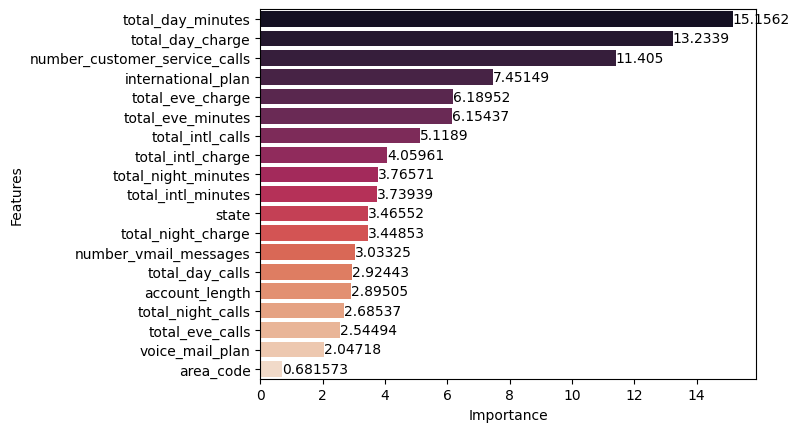

In [41]:
# imp_df.sort_values(ascending=False, by='Importance').plot.bar()

ax = sns.barplot(data=imp_df, x='Importance', y='Features', palette='rocket')

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

<p1>We will set a threshold of '2.5'. we will drop features with importance less that '2.5'</p1>

In [42]:
selected_features = list(imp_df['Features'][imp_df['Importance'] > 2.5])

In [43]:
imp_df = df[selected_features].copy()
imp_df['churn'] = df['churn']
imp_df.head()

,total_day_minutes,total_day_charge,number_customer_service_calls,international_plan,total_eve_charge,total_eve_minutes,total_intl_calls,total_intl_charge,total_night_minutes,total_intl_minutes,state,total_night_charge,number_vmail_messages,total_day_calls,account_length,total_night_calls,total_eve_calls,churn
0,161.6,27.47,1,0,16.62,195.5,3,3.70,254.4,13.7,0.126324,11.45,26,123,107,103,103,0
1,243.4,41.38,0,0,10.30,121.2,5,3.29,162.6,12.2,0.270768,7.32,0,114,137,104,110,0
2,299.4,50.90,2,1,5.26,61.9,7,1.78,196.9,6.6,0.126324,8.86,0,71,84,89,88,0
3,166.7,28.34,3,1,12.61,148.3,3,2.73,186.9,10.1,0.204934,8.41,0,113,75,121,122,0
4,218.2,37.09,3,0,29.62,348.5,7,2.03,212.6,7.5,0.157287,9.57,24,88,121,118,108,0


In [44]:
imp_df.shape

(4250, 18)

In [45]:
feature_selection['Technique'].append('Rand_imp')
feature_selection['data'].append(imp_df)

In [46]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt

In [47]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.126324,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,0.270768,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,0.126324,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,0.204934,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,0.157287,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [48]:
X = np.array(df.drop('churn', axis=1))
y = np.array(df['churn'])

In [49]:
ranks = fisher_score.fisher_score(X, y)
feat_imp = pd.Series(ranks, df.columns[0:len(df.columns) - 1])

In [50]:
feat_imp.index

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

In [51]:
feat_dict = {
    'Features' : list(),
    'Fisher_score' : list(),
}

In [52]:
feat_dict['Features'] = feat_imp.index
feat_dict['Fisher_score'] = feat_imp.values

In [53]:
feat_df = pd.DataFrame(data=feat_dict)
feat_df

,Features,Fisher_score
0,state,15
1,account_length,0
2,area_code,12
3,international_plan,10
4,voice_mail_plan,18
5,number_vmail_messages,14
6,total_day_minutes,13
7,total_day_calls,9
8,total_day_charge,7
9,total_eve_minutes,3


<ipython-input-54-5afacd0ece98>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=feat_df, x='Fisher_score', y='Features', palette='rocket')


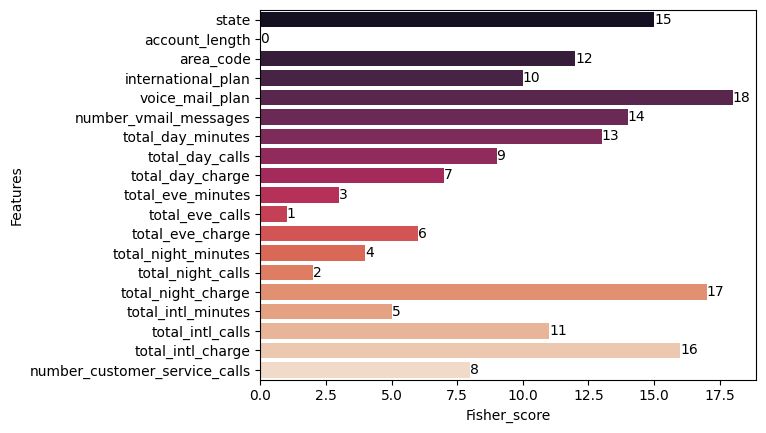

In [54]:
ax = sns.barplot(data=feat_df, x='Fisher_score', y='Features', palette='rocket')

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

<p1>We will pick top 14 featuers</p1>

In [55]:
fisher_df = df[feat_df['Features'][feat_df['Fisher_score'] >= 5]].copy()

In [56]:
columns_to_drop = list(df[feat_df['Features'][feat_df['Fisher_score'] < 5]].columns)
columns_to_drop

['account_length',
 'total_eve_minutes',
 'total_eve_calls',
 'total_night_minutes',
 'total_night_calls']

In [57]:
len(fisher_df.columns)

14

In [58]:
cat_cols

['state', 'area_code', 'international_plan', 'voice_mail_plan']

In [59]:
fisher_df['churn'] = df['churn']

In [60]:
fisher_df.head()

,state,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_charge,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.126324,1,0,1,26,161.6,123,27.47,16.62,11.45,13.7,3,3.70,1,0
1,0.270768,1,0,0,0,243.4,114,41.38,10.30,7.32,12.2,5,3.29,0,0
2,0.126324,0,1,0,0,299.4,71,50.90,5.26,8.86,6.6,7,1.78,2,0
3,0.204934,1,1,0,0,166.7,113,28.34,12.61,8.41,10.1,3,2.73,3,0
4,0.157287,2,0,1,24,218.2,88,37.09,29.62,9.57,7.5,7,2.03,3,0


In [61]:
feature_selection['Technique'].append('Fisher_score')
feature_selection['data'].append(fisher_df)

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score

In [63]:
models = {
    'Random_forest' : RandomForestClassifier(),
    'Gradient_boost' : GradientBoostingClassifier(),
    'xgb' : XGBClassifier()
}

In [64]:
perform_dict = {
    'Model_name' : list(),
    # 'Model' : list(),
    # 'Data' : list(),
    'Technique' : list(),
    'F1_score' : list(),
    'recall_score' : list(),
    'precision_score' : list()
}

In [65]:
list(feature_selection.values())[0]

['pca_chi_squre', 'No_fe_sel', 'Rand_imp', 'Fisher_score']

In [66]:
for model_name, model in zip(list(models.keys()), list(models.values())):

    prev_score = 0
    curr_score = 0

    for technique, data in zip(list(feature_selection.values())[0], list(feature_selection.values())[1]):

        X = data.drop('churn', axis=1)
        y = data['churn']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        perform_dict['Model_name'].append(model_name)
        # perform_dict['Model'].append(model)
        # perform_dict['Data'].append(data)
        perform_dict['Technique'].append(technique)
        perform_dict['F1_score'].append(f1_score(y_test, y_pred) * 100)
        perform_dict['precision_score'].append(precision_score(y_test, y_pred) * 100)
        perform_dict['recall_score'].append(recall_score(y_test, y_pred) * 100)

        curr_score = recall_score(y_test, y_pred) * 100

        if curr_score > prev_score:
          best_model = model

        prev_score = curr_score


In [67]:
perform_df = pd.DataFrame(data=perform_dict)

In [68]:
perform_df

,Model_name,Technique,F1_score,recall_score,precision_score
0,Random_forest,pca_chi_squre,48.529412,33.165829,90.410959
1,Random_forest,No_fe_sel,82.051282,72.361809,94.736842
2,Random_forest,Rand_imp,84.090909,74.371859,96.732026
3,Random_forest,Fisher_score,81.609195,71.356784,95.302013
4,Gradient_boost,pca_chi_squre,53.424658,39.195980,83.870968
5,Gradient_boost,No_fe_sel,81.920904,72.864322,93.548387
6,Gradient_boost,Rand_imp,81.586402,72.361809,93.506494
7,Gradient_boost,Fisher_score,80.341880,70.854271,92.763158
8,xgb,pca_chi_squre,62.500000,50.251256,82.644628
9,xgb,No_fe_sel,81.481481,71.859296,94.078947


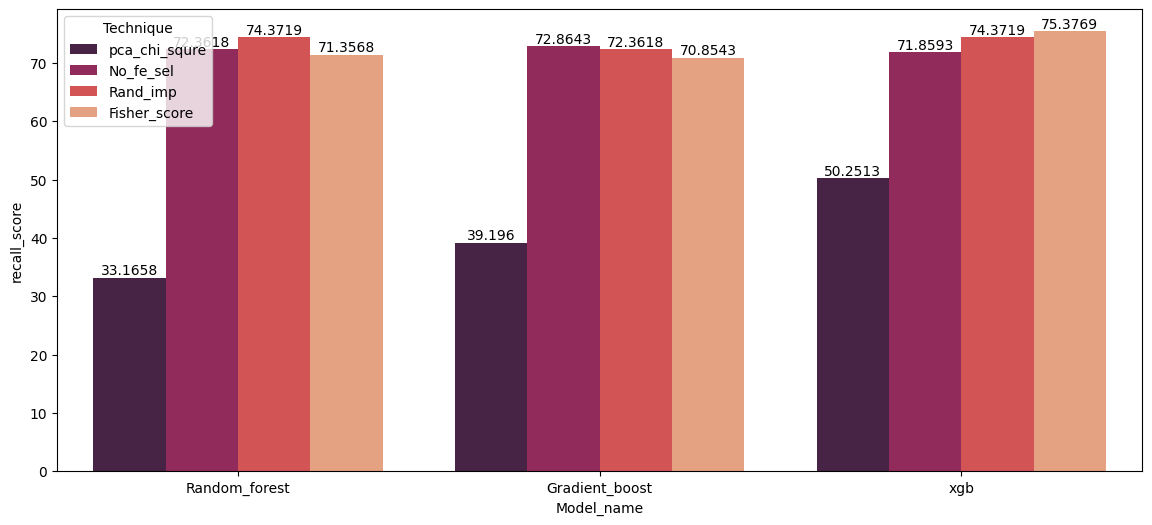

In [69]:
plt.figure(figsize=(14,6))

ax = sns.barplot(data=perform_df, x='Model_name', y='recall_score', hue='Technique', palette='rocket')

for i in ax.containers:
  ax.bar_label(i,)

plt.show()

<p1>The combinatiion of Model and Feature selection technique with highest recall_score is XGB and Fisher score, we will be using this combination as our final solution. We will try to improve recall score more futhur by using hyper parameter tunning</p1>

In [70]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,confusion_matrix

In [71]:
X = fisher_df.drop('churn', axis=1)
y = fisher_df['churn']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [73]:
y_pred = best_model.predict(X_test)

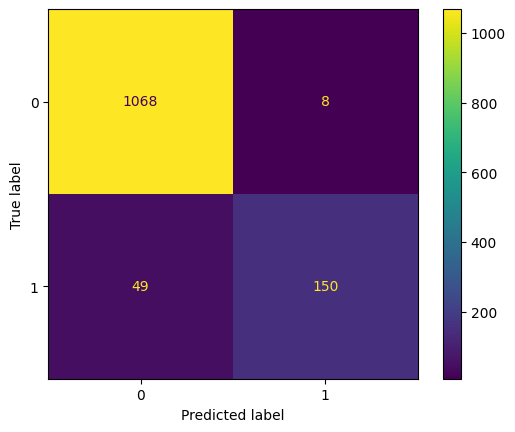

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1076
           1       0.95      0.75      0.84       199

    accuracy                           0.96      1275
   macro avg       0.95      0.87      0.91      1275
weighted avg       0.96      0.96      0.95      1275



In [74]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()
print(classification_report(y_test, y_pred))

<p1>As we can see recall is 75 % because number of False Negative datapoints is 49, and this is what we want to reduce.</p1>

<p1>There are two ways to handle this, we can go with standard f1-score (Which gives importace to both precision and recall) to evaluate the performance of the cross-validated model when performing a hyperparameter optimization with GridSearchCV.

But as discussed we want to prioritize recall so we will go with F-Beta score with beta = 2, which will give recall more importance<p1>

#### **Using F1_score to optimize while hyperparamter tunning using make_scorer function**

In [75]:
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [76]:
f1_scorer = make_scorer(
    # fbeta_score,
    # beta=1,
    precision_score,
    greater_is_better=True,
    pos_label=0
)

In [77]:
grid_param = {
    'scale_pos_weight' : np.arange(-10, 10, 0.1),
    # 'sample_weight' : np.arange(-1, 1, 0.1)
}

In [78]:
xgb_f1 = GridSearchCV(
    estimator=best_model,
    param_grid=grid_param,
    cv=4,
    scoring=f1_scorer,
)

In [79]:
xgb_f1.fit(X_train, y_train, eval_metric='aucpr')

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgbo

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
        8.00000000e+00,  8.10000000e+00,  8.20000000e+00,  8.30000000e+00,
        8.40000000e+00,  8.50000000e+00,  8.60000000e+00,  8.70000000e+00,
        8.80000000e+00,  8.90000000e+00,  9.00000000e+00,  9.10000000e+00,
        9.20000000e+00,  9.30000000e+00,  9.40000000e+00,  9.50000000e+00,
        9.60000000e+00,  9.70000000e+00,  9.80000000e+00,  9.90000000e+00])},
             scoring=make_scorer(precision_score, pos_label=0))

In [80]:
y_pred = xgb_f1.predict(X_test)

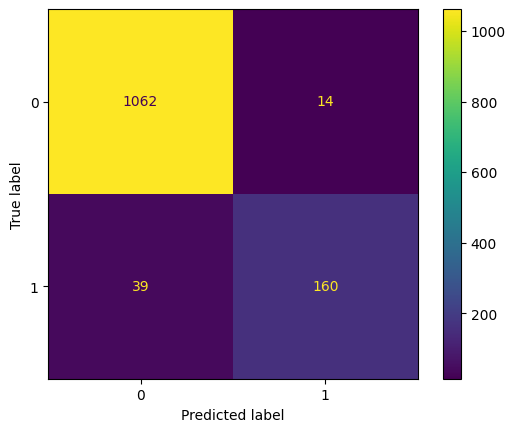

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1076
           1       0.92      0.80      0.86       199

    accuracy                           0.96      1275
   macro avg       0.94      0.90      0.92      1275
weighted avg       0.96      0.96      0.96      1275



In [81]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()
print(classification_report(y_test, y_pred))

In [82]:
import pickle as pkl
import os
import sys

In [83]:
new_model = XGBClassifier(**xgb_f1.best_params_)

new_model.fit(X_train, y_train)
y_pred = new_model.predict(X_test)

In [84]:
fisher_df['churn'].value_counts()

churn
0    3652
1     598
Name: count, dtype: int64

In [85]:
param_path = os.path.join('Artifacts', 'best_params.pkl')

In [86]:
param_path

'Artifacts/best_params.pkl'

In [87]:
dir_path = os.path.dirname(param_path)

In [88]:
dir_path

'Artifacts'

In [89]:
os.makedirs(dir_path, exist_ok=True)

with open(param_path, 'wb') as file_obj:

  pkl.dump(xgb_f1.best_params_, file_obj)

In [90]:
with open(param_path, 'rb') as file_obj:
  best_params = pkl.load(file_obj)

In [91]:
best_params

{'scale_pos_weight': 7.699999999999939}